<a href="https://colab.research.google.com/github/C191068/Ali_Stock_Price_Prediction_using_LSTM/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AAPL.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600
...,...,...,...,...,...,...,...
10679,2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
10680,2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
10681,2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800
10682,2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df = df.sort_values("Date")


df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600
...,...,...,...,...,...,...,...
10679,2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
10680,2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
10681,2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800
10682,2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300


In [ ]:
df.set_index("Date", inplace=True)


df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600
...,...,...,...,...,...,...
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800


In [ ]:
data = df[["Close"]].values



data

array([[1.28348000e-01],
       [1.21652000e-01],
       [1.12723000e-01],
       ...,
       [1.63759995e+02],
       [1.68410004e+02],
       [1.69679993e+02]])

In [ ]:
# Scale the data between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))

data = scaler.fit_transform(data)

np.set_printoptions(suppress=True, precision=10)


data

array([[0.0004354837],
       [0.0003986846],
       [0.0003496136],
       ...,
       [0.8997037209],
       [0.9252587127],
       [0.9322381742]])

In [ ]:
def create_time_series(data, lookback=60, predict_steps=1):

    X, y = [], []

    for i in range(lookback, len(data) - predict_steps + 1):

        X.append(data[i - lookback:i])

        y.append(data[i:i + predict_steps])

    return np.array(X), np.array(y)

In [ ]:
# Create the model
model = Sequential()

model.add(LSTM(100, input_shape=(60, 1), return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(200, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(200, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(100))

model.add(Dropout(0.2))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss="mean_absolute_error", optimizer=optimizer)

In [ ]:
# Split the data into train, validation, and test sets

train_data = data[:2000]

X_train, y_train = create_time_series(train_data, lookback=60)


val_data = data[2000:2500]

X_val, y_val = create_time_series(val_data, lookback=60)


test_data = data[2500:]

X_test, y_test = create_time_series(test_data, lookback=60)

In [ ]:
# Train the model with early stopping and a validation set

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100
31/31 [==============================] - 39s 939ms/step - loss: 9.0096e-04 - val_loss: 0.0010
Epoch 2/100
31/31 [==============================] - 27s 885ms/step - loss: 4.7541e-04 - val_loss: 0.0012
Epoch 3/100
31/31 [==============================] - 28s 898ms/step - loss: 3.9426e-04 - val_loss: 2.8505e-04
Epoch 4/100
31/31 [==============================] - 27s 879ms/step - loss: 3.7725e-04 - val_loss: 8.9503e-04
Epoch 5/100
31/31 [==============================] - 27s 882ms/step - loss: 3.2270e-04 - val_loss: 4.0786e-04
Epoch 6/100
31/31 [==============================] - 26s 831ms/step - loss: 2.7019e-04 - val_loss: 2.2602e-04
Epoch 7/100
31/31 [==============================] - 27s 847ms/step - loss: 2.3116e-04 - val_loss: 2.0723e-04
Epoch 8/100
31/31 [==============================] - 27s 882ms/step - loss: 1.7025e-04 - val_loss: 1.9582e-04
Epoch 9/100
31/31 [==============================] - 27s 879ms/step - loss: 1.9117e-04 - val_loss: 2.2543e-04
Epoch 10/100
31/31

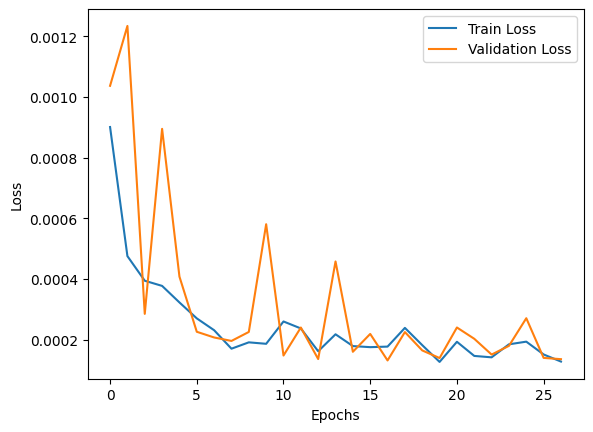

In [ ]:
# Visualize the training process

plt.plot(history.history['loss'], label='Train Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

In [ ]:
# Make predictions on the test data

y_pred = model.predict(X_test)

254/254 [==============================] - 42s 167ms/step


In [ ]:
mae = mean_absolute_error(y_test.flatten(), y_pred.flatten())


In [ ]:
# Print the mean absolute error

print("MAE:", mae)

MAE: 0.02110369060797883


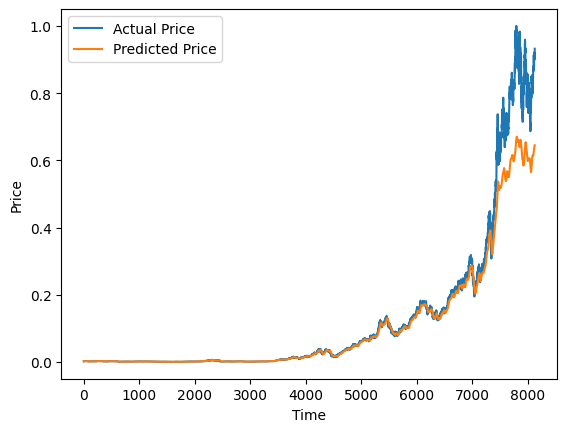

In [ ]:
# Plot the actual and predicted prices

plt.plot(y_test.flatten(), label="Actual Price")
plt.plot(y_pred.reshape(-1), label="Predicted Price")


plt.xlabel("Time")

plt.ylabel("Price")

plt.legend()

plt.show()